In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from pyschroedinger import schroedinger
from math import pi, sqrt

In [2]:
def intervall(a, b, n = 1000):
    return (a + (b-a)*i/(n-1) for i in range(n))


In [3]:
def plot_vecs(plt, a, b, vecs, labels, n=2, xlab="χ", ylab="ψ(χ)"):
    plt.legend(
        plt.plot(list(intervall(a, b)), vecs[:, 0:n]),
        list(labels)
    )
    plt.set_xlabel(xlab)
    plt.set_ylabel(ylab)

label_Energy = lambda Eval: map(lambda t: f"$ϵ_{t[0]+1}={t[1]}$", enumerate(Eval))
    

<IPython.core.display.Javascript object>


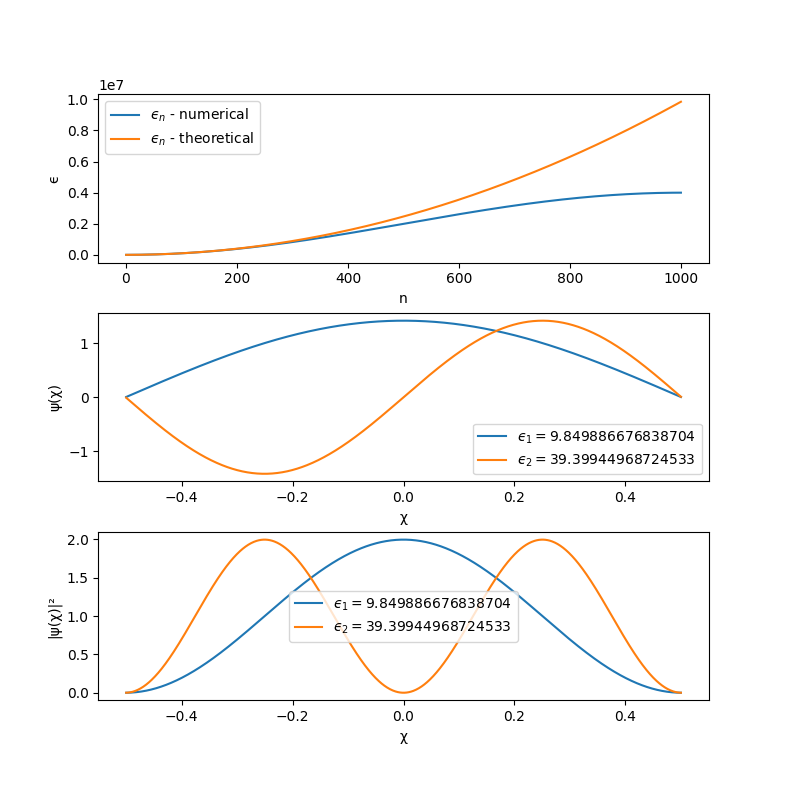

In [4]:
a = -1/2
b = 1/2
Pot = "0"
Eval, Evec = schroedinger(Pot, a, b, 999)
fg1 = plt.figure()

plt11 = fg1.add_subplot(311)

nrange = range(1, len(Eval) + 1)

plt11.legend(
    plt11.plot(nrange, Eval, nrange, [pi**2*n**2 for n in nrange]),
    ("$ϵ_n$ - numerical", "$ϵ_n$ - theoretical")
)
plt11.set_xlabel("n")
plt11.set_ylabel("ϵ")

plt12 = fg1.add_subplot(312)
plot_vecs(plt12, a, b, Evec, label_Energy(Eval))

plt13 = fg1.add_subplot(313)
plot_vecs(plt13, a, b, Evec**2, label_Energy(Eval), ylab="|ψ(χ)|²")

fg1.set_size_inches(20/2.54, 20/2.54)
fg1.subplots_adjust(hspace=.3)

<IPython.core.display.Javascript object>


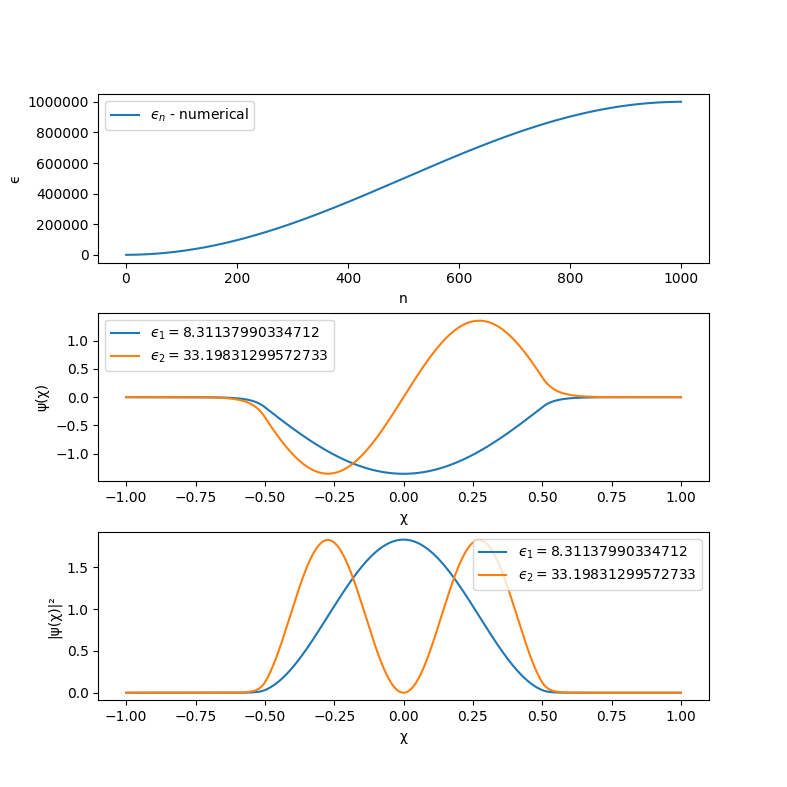

In [5]:
a = -1
b = 1
Pot = "(x < -1/2 or x > 1/2)*500"
Eval, Evec = schroedinger(Pot, a, b, 999)

nrange = range(1, len(Eval) + 1)

fg2 = plt.figure()

plt21 = fg2.add_subplot(311)

plt21.legend(
    plt21.plot(nrange, Eval),
    ("$ϵ_n$ - numerical",)
)
plt21.set_xlabel("n")
plt21.set_ylabel("ϵ")


plt22 = fg2.add_subplot(312)
plot_vecs(plt22, a, b, Evec, label_Energy(Eval))

plt23 = fg2.add_subplot(313)
plot_vecs(plt23, a, b, Evec**2, label_Energy(Eval), ylab="|ψ(χ)|²")

fg2.set_size_inches(20/2.54, 20/2.54)
fg2.subplots_adjust(hspace=.3)

$\nu(\chi) = \frac{1}{2} \frac{\omega}{\omega_0}^2 \chi^2
= \frac{1}{2} \frac{\omega}{\frac{\hbar}{\sqrt{2} m x_0^2}}^2 \chi^2
= \frac{1}{2} \frac{\omega^2}{\frac{\hbar^2}{2 m^2 x_0^4}} \chi^2
= \frac{1}{2} \frac{m \omega^2}{\frac{\hbar^2}{2 m x_0^2}} (\chi * x_0)^2
= \frac{V(x)}{\frac{\hbar^2}{2 m x_0^2}}
$

<IPython.core.display.Javascript object>


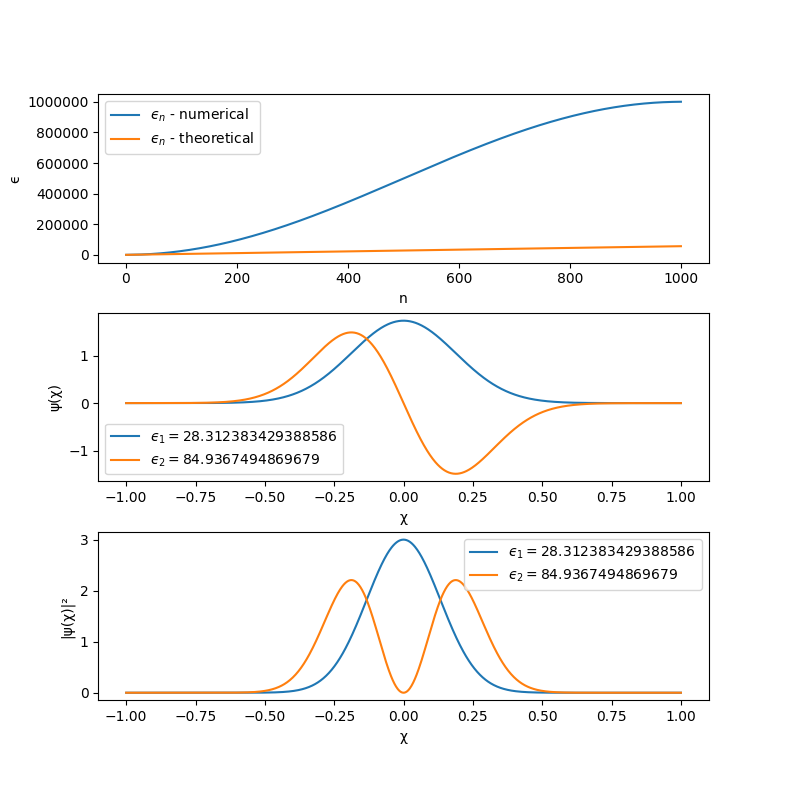

In [6]:
a = -1
b = 1
Pot = "1/2*40^2*x^2"
Eval, Evec = schroedinger(Pot, a, b, 999, prec=1e-50)

nrange = range(1, len(Eval) + 1)

fg3 = plt.figure()

plt31 = fg3.add_subplot(311)

plt31.legend(
    plt31.plot(nrange, Eval, nrange, [sqrt(2)*40*(n+1/2) for n in nrange]),
    ("$ϵ_n$ - numerical",
    "$ϵ_n$ - theoretical")
)
plt31.set_xlabel("n")
plt31.set_ylabel("ϵ")


plt32 = fg3.add_subplot(312)
plot_vecs(plt32, a, b, Evec, label_Energy(Eval))

plt33 = fg3.add_subplot(313)
plot_vecs(plt33, a, b, Evec**2, label_Energy(Eval), ylab="|ψ(χ)|²")

fg3.set_size_inches(20/2.54, 20/2.54)
fg3.subplots_adjust(hspace=.3)

Approximation of Morse potential via Taylor in neighbourhood of $x = x_e$:

$V(x) = V_0 \alpha^2(x-x_e)^2$

<IPython.core.display.Javascript object>


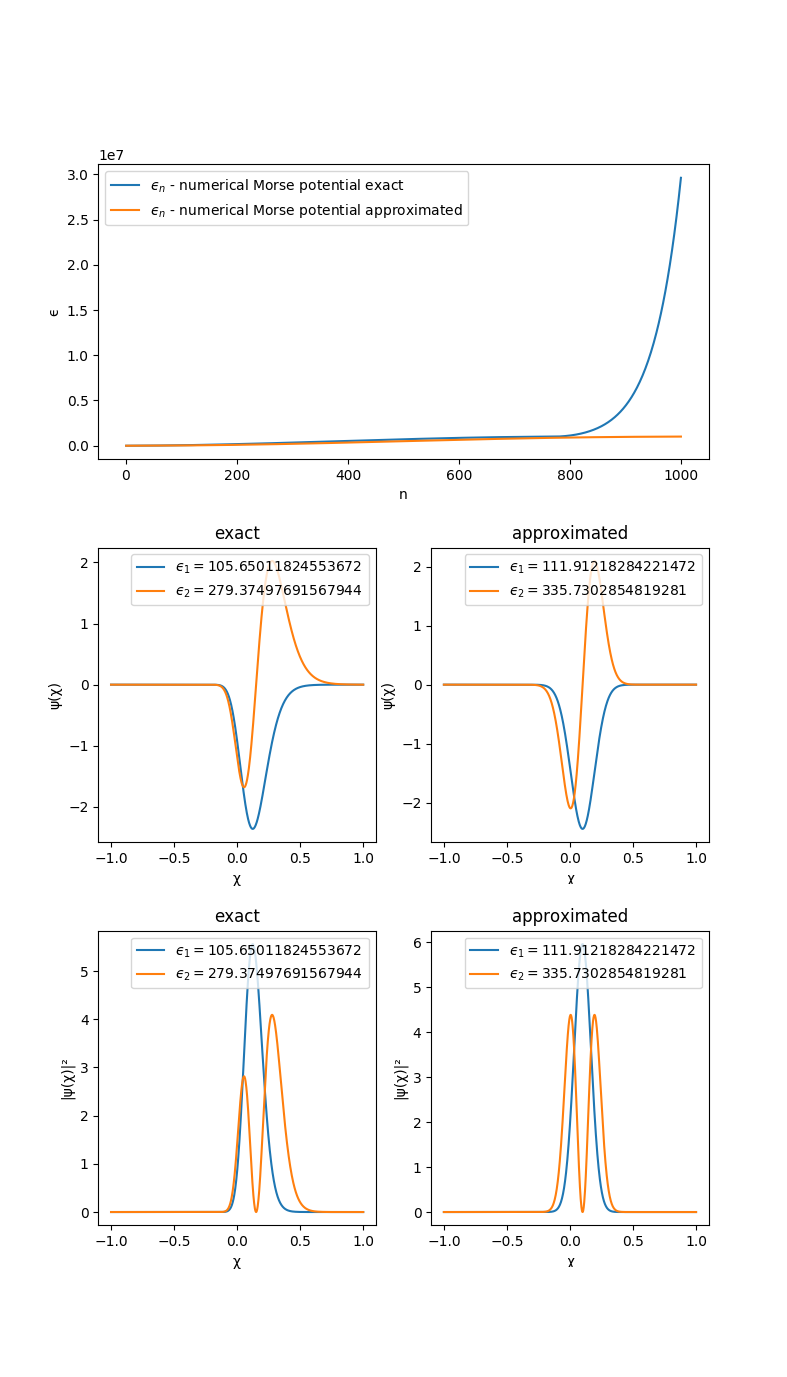

In [7]:
a = -1
b = 1
Pot1 = "500*(1-exp(-5(x-0.1)))^2"
Pot2 = "500*(-5)^2*(x-0.1)^2"

Eval1, Evec1 = schroedinger(Pot1, a, b, 999, prec=1e-50)
Eval2, Evec2 = schroedinger(Pot2, a, b, 999, prec=1e-50)

nrange = range(1, len(Eval) + 1)

fg4 = plt.figure()

plt41 = fg4.add_subplot(311)

plt41.legend(
    plt41.plot(nrange, Eval1, nrange, Eval2),
    ("$ϵ_n$ - numerical Morse potential exact",
    "$ϵ_n$ - numerical Morse potential approximated")
)

plt41.set_xlabel("n")
plt41.set_ylabel("ϵ")


plt42 = fg4.add_subplot(323)
plt42.set_title("exact")
plot_vecs(plt42, a, b, Evec1, label_Energy(Eval1))

plt43 = fg4.add_subplot(324)
plt43.set_title("approximated")
plot_vecs(plt43, a, b, Evec2, label_Energy(Eval2))

plt44 = fg4.add_subplot(325)
plt44.set_title("exact")
plot_vecs(plt44, a, b, Evec1**2, label_Energy(Eval1), ylab="|ψ(χ)|²")

plt45 = fg4.add_subplot(326)
plt45.set_title("approximated")
plot_vecs(plt45, a, b, Evec2**2, label_Energy(Eval2), ylab="|ψ(χ)|²")

fg4.set_size_inches(20/2.54, 35/2.54)
fg4.subplots_adjust(hspace=.3)